In [86]:
import numpy as np 
import pandas as pd

In [87]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [88]:
df_m = pd.read_csv("Disease_e432.csv")
df_m.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,has_disease
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1000.000000
mean,0.061449,0.013504,0.039953,-0.024244,-0.024503,-0.019314,-0.009680,0.021369,0.009249,0.029241,0.492000
std,1.000709,1.015254,0.968215,0.956746,0.997461,0.982093,1.018321,1.023561,1.001106,0.982875,0.500186
min,-3.104985,-3.043772,-3.200309,-3.291390,-3.326150,-3.631807,-3.160980,-2.831989,-2.756445,-3.375938,0.000000
25%,-0.589106,-0.665436,-0.602495,-0.653597,-0.650038,-0.702880,-0.689058,-0.645849,-0.667977,-0.603557,0.000000
50%,0.106448,0.036269,0.071767,-0.011506,-0.028608,-0.005093,-0.060797,-0.006804,0.007702,-0.012481,0.000000
75%,0.778492,0.681728,0.684049,0.648392,0.612200,0.670594,0.696355,0.729392,0.697494,0.700107,1.000000
max,3.072266,4.531459,3.057448,2.975510,3.026105,3.194191,3.081658,3.083940,2.856670,3.683265,1.000000


In [89]:
df_m.head().T

,0,1,2,3,4
name,P0,P1,P2,P3,P4
f0,0.797847,-0.128786,0.473949,-1.587714,0.10568
f1,1.05665,0.300952,-1.527089,0.274934,-1.030349
f2,0.399665,0.10515,-0.047438,-1.207918,-0.748718
f3,-0.337369,-1.739722,-0.418057,1.636696,-0.235349
f4,-0.473735,-2.266174,0.610244,0.150616,-1.420643
f5,-0.195699,1.08588,1.321639,-0.175028,-1.277329
f6,-0.338654,-0.369869,-0.129651,0.725456,-2.491605
f7,-0.97204,-0.309987,0.574123,-0.429067,0.894299
f8,1.193842,-0.070969,0.761331,0.780608,-1.039067


In [90]:
from sklearn.model_selection import train_test_split 

dat_test = df_m[df_m["has_disease"].isna()]
Xtest, Ytest = dat_test[[col for col in dat_test.columns if col != "has_disease"]], \
               dat_test["has_disease"]

dat_tr_cv = df_m[~(df_m["has_disease"].isna())]
X_tr_cv, Y_tr_cv = dat_tr_cv.drop("has_disease", axis = 1), \
                   dat_tr_cv["has_disease"]

Xtr, Xcv, Ytr, Ycv = train_test_split(X_tr_cv, Y_tr_cv, test_size = 0.2, shuffle=True)

In [91]:
Xtr.shape, Ytr.shape, Xcv.shape, Ycv.shape, Xtest.shape, Ytest.shape

((800, 11), (800,), (200, 11), (200,), (15, 11), (15,))

In [92]:
from sklearn.preprocessing import StandardScaler

try:
    Xtr.drop('name', axis = 1, inplace=True)
    Xcv.drop('name', axis = 1, inplace=True)
except:
    print('[TM] Already dropped.')
scaler = StandardScaler()
scaler.fit(Xtr)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


StandardScaler()

In [93]:
X_tr_sc = scaler.transform(Xtr)
X_cv_sc = scaler.transform(Xcv)

In [94]:
from sklearn.linear_model import LogisticRegression
lambdas = np.linspace(0.01, 10, 100)
tr_loss, te_loss = [], []

def accuracy(Yp, Y):
    return (Yp == Y).mean()
for lmbda in lambdas:
    model = LogisticRegression(C = 1/lmbda)
    model.fit(X_tr_sc, Ytr)
    tr_loss.append(accuracy(model.predict(X_tr_sc), Ytr))
    te_loss.append(accuracy(model.predict(X_cv_sc), Ycv))

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


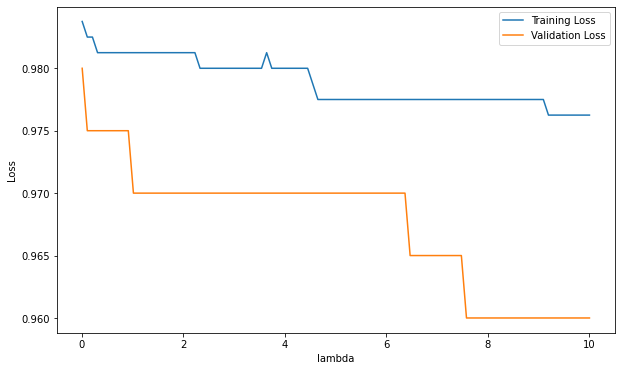

In [95]:
import matplotlib.pyplot as plt 
import seaborn as sns
 
plt.figure(figsize=(10, 6))
sns.lineplot(lambdas , tr_loss)
sns.lineplot(lambdas, te_loss)
plt.xlabel('lambda')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [108]:
X_total = dat_tr_cv.drop(["name", "has_disease"], axis = 1)
X_total = scaler.transform(X_total)
Y_total = dat_tr_cv["has_disease"]

lmbda = 0.01 
model_total = LogisticRegression(C = 1/lmbda)
model_total.fit(X_total, Y_total)

LogisticRegression(C=100.0)

In [109]:
print(f'Model Accuracy: {accuracy(model.predict(X_cv_sc), Ycv) * 100}%')

Model Accuracy: 96.0%


In [110]:
print(f'Model Accuracy [Train Total]: {accuracy(model_total.predict(X_total), Y_total) * 100}%')

Model Accuracy [Train Total]: 98.3%


In [102]:
model_total.coef_, model_total.intercept_

(array([[ -8.24263636,   6.66317931,  -4.42556919,   1.33188246,
          10.25711034,  -3.31004543,   2.4892586 , -10.85986612,
         -39.18127275,  14.32132099]]),
 array([0.00851371]))

In [113]:
import pickle 

total_model = {
    "model": model_total,
    "lambda": 0.01,
    "scaler": scaler
}
with open("e432.ml", "wb") as file:
    pickle.dump(total_model, file)

### Loading model and doing operations on Xtest

In [ ]:
with open("e432.ml", "rb") as file:
    total_model = pickle.load(file)

Xtest = Xtest.drop("name", axis = 1)
Xtest = total_model["scaler"].transform(Xtest)
Yp = total_model["model"].predict(Xtest)

In [117]:
dat_test["has_disease"] = Yp

C:\Users\tirth\AppData\Local\Temp/ipykernel_68092/355273933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_test["has_disease"] = Yp


In [120]:
dat_test[["name", "has_disease"]]

,name,has_disease
1000,PT0,0.0
1001,PT1,0.0
1002,PT2,1.0
1003,PT3,0.0
1004,PT4,0.0
1005,PT5,0.0
1006,PT6,0.0
1007,PT7,1.0
1008,PT8,1.0
1009,PT9,0.0
